In [7]:
# configure the path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing datset Dog vs Cat Dataset from kaggle

In [8]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:10<00:00, 58.5MB/s]
100% 812M/812M [00:10<00:00, 83.2MB/s]


In [9]:
%ls

dogs-vs-cats.zip  kaggle.json  sample_data/


In [10]:
# extraxct the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("dataset extracted")

dataset extracted


In [11]:
# extraxct the compressed dataset
from zipfile import ZipFile

dataset='/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("dataset extracted")

dataset extracted


In [12]:
import os
#counting number of file in train folder
path, dirs, files=next(os.walk('/content/train'))
file_count=len(files)
print("number of images",file_count)

number of images 25000


Printing the name of images

In [13]:
file_name=os.listdir('/content/train')

In [14]:
print(file_name)

['cat.6365.jpg', 'dog.3931.jpg', 'cat.8732.jpg', 'cat.8877.jpg', 'cat.10519.jpg', 'dog.2158.jpg', 'cat.5242.jpg', 'dog.5448.jpg', 'cat.5615.jpg', 'cat.2554.jpg', 'dog.570.jpg', 'dog.1305.jpg', 'dog.4615.jpg', 'cat.8319.jpg', 'cat.5016.jpg', 'dog.9682.jpg', 'dog.3795.jpg', 'cat.11866.jpg', 'cat.12067.jpg', 'dog.1293.jpg', 'dog.261.jpg', 'dog.3155.jpg', 'dog.5077.jpg', 'dog.4678.jpg', 'cat.3869.jpg', 'dog.2143.jpg', 'dog.2048.jpg', 'cat.9657.jpg', 'cat.7937.jpg', 'cat.3867.jpg', 'cat.7809.jpg', 'dog.10864.jpg', 'cat.8392.jpg', 'dog.1352.jpg', 'cat.9417.jpg', 'dog.5308.jpg', 'cat.2588.jpg', 'dog.8316.jpg', 'dog.9262.jpg', 'cat.10723.jpg', 'dog.8268.jpg', 'dog.2059.jpg', 'cat.12202.jpg', 'cat.6199.jpg', 'dog.1908.jpg', 'cat.8208.jpg', 'dog.10517.jpg', 'dog.2325.jpg', 'cat.6875.jpg', 'dog.917.jpg', 'dog.3107.jpg', 'cat.2170.jpg', 'cat.9650.jpg', 'dog.9785.jpg', 'cat.6041.jpg', 'cat.9544.jpg', 'cat.10070.jpg', 'cat.3405.jpg', 'cat.553.jpg', 'dog.7364.jpg', 'dog.2495.jpg', 'cat.5131.jpg', 'ca

Importing the dependencies

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

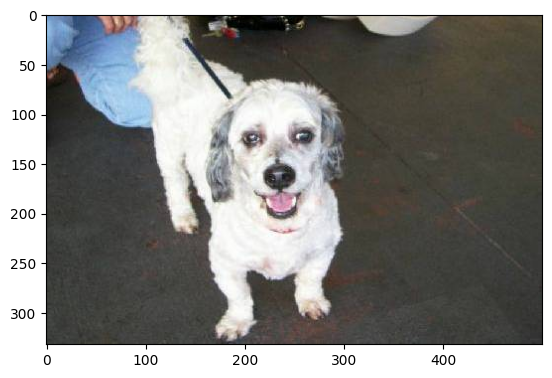

In [16]:
# display dog image
img = mpimg.imread('/content/train/dog.3169.jpg')
imgplot = plt.imshow(img)
plt.show()

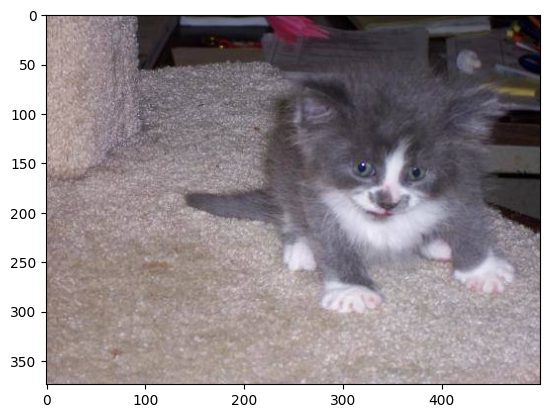

In [17]:
# display cat image
img = mpimg.imread('/content/train/cat.7458.jpg')
imgplot = plt.imshow(img)
plt.show()

In [18]:
file_names=os.listdir('/content/train/')
for i in range(10):
  name = file_names[i]
  print(name[:3])

cat
dog
cat
cat
cat
dog
cat
dog
cat
cat


In [19]:
file_names = os.listdir('/content/train/')
dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[:3]
  if name=='dog':
    dog_count += 1
  else:
    cat_count += 1
print('Number of dog counts', dog_count)
print('Number of cat counts', cat_count)


Number of dog counts 12500
Number of cat counts 12500


Resizing all the images

In [20]:
# creating a directory for resize images
os.mkdir('/content/image resized')

In [21]:
original_folder='/content/train/'
resized_folder='/content/image resized/'
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path=original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')
  newImgPath = resized_folder + filename
  img.save(newImgPath)


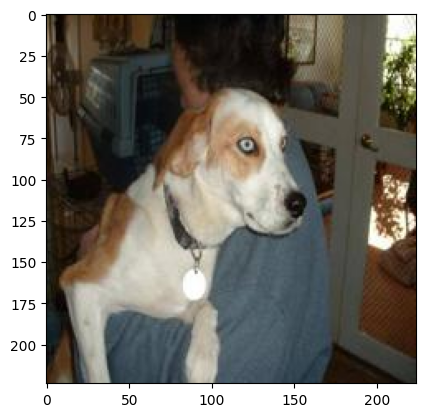

In [24]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.3931.jpg')
imgplot = plt.imshow(img)
plt.show()

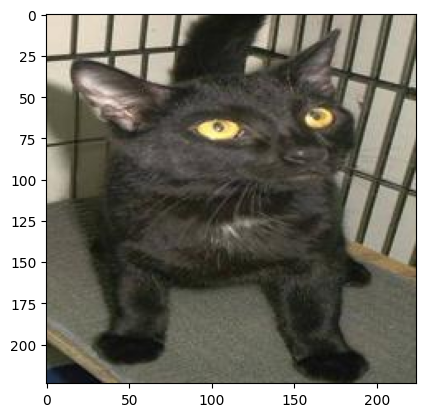

In [25]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.6365.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating labels for cat and dog images

cat-->0

dog-->1

In [26]:
# creating the for loops to asign labels
file_names = os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name=file_names[i][:3]
  if file_name=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [27]:
print(file_names[:5])

['cat.6365.jpg', 'dog.3931.jpg', 'cat.8732.jpg', 'cat.8877.jpg', 'cat.10519.jpg']


In [28]:
print(labels[:5])

[0, 1, 0, 0, 0]


In [29]:
len(labels)

2000

In [30]:
# counting the images of doga and cat
value , counts=np.unique(labels, return_counts=True)

In [31]:
print(value, counts)

[0 1] [ 968 1032]


converting all the resized image intomnumpy array






In [32]:
import cv2
import glob

In [33]:
image_directory='/content/image resized/'
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory+ '*.'+e)) for e in image_extension]


dog_cat_images= np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[206 223 236]
   [206 223 236]
   [206 223 236]
   ...
   [175 193 200]
   [174 194 199]
   [136 156 161]]

  [[206 223 236]
   [206 223 236]
   [206 223 236]
   ...
   [174 192 199]
   [167 187 192]
   [127 147 152]]

  [[205 222 235]
   [205 222 235]
   [205 222 235]
   ...
   [173 191 198]
   [157 177 182]
   [115 135 140]]

  ...

  [[ 79  51  34]
   [ 79  51  34]
   [ 79  51  34]
   ...
   [ 87 100  98]
   [ 87 100  98]
   [ 90 103 101]]

  [[ 83  53  34]
   [ 81  54  34]
   [ 80  52  35]
   ...
   [ 86  99  97]
   [ 89 102 100]
   [ 95 108 106]]

  [[ 85  55  36]
   [ 84  54  35]
   [ 80  52  35]
   ...
   [ 84  97  95]
   [ 86  99  97]
   [ 94 107 105]]]


 [[[ 54  82  93]
   [ 46  73  83]
   [  4  29  39]
   ...
   [238 244 243]
   [244 250 249]
   [225 231 230]]

  [[ 62  90 101]
   [ 53  80  90]
   [  9  34  44]
   ...
   [224 232 231]
   [232 238 237]
   [240 248 247]]

  [[ 63  91 102]
   [ 55  82  92]
   [  9  34  44]
   ...
   [215 226 224]
   [220 228 227]
   [246 255

In [35]:
type(dog_cat_images)

numpy.ndarray

In [36]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [37]:
X=dog_cat_images
y=np.asarray(labels)

Train test split

In [38]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
print(X_train.shape, X_test.shape)

(1600, 224, 224, 3) (400, 224, 224, 3)


1600 train image
400 test images

In [40]:
# scalling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [41]:
print(X_train_scaled)

[[[[0.06666667 0.05882353 0.05882353]
   [0.05490196 0.04705882 0.04705882]
   [0.04313725 0.03529412 0.03529412]
   ...
   [0.4745098  0.54901961 0.57647059]
   [0.45490196 0.54117647 0.56078431]
   [0.44313725 0.52941176 0.54901961]]

  [[0.05490196 0.04705882 0.04705882]
   [0.05098039 0.04313725 0.04313725]
   [0.04705882 0.03921569 0.03921569]
   ...
   [0.4745098  0.54901961 0.57647059]
   [0.45490196 0.54117647 0.56470588]
   [0.45098039 0.5372549  0.56078431]]

  [[0.0627451  0.05490196 0.05490196]
   [0.06666667 0.05882353 0.05882353]
   [0.06666667 0.05882353 0.05882353]
   ...
   [0.4745098  0.54509804 0.58823529]
   [0.45882353 0.5372549  0.58039216]
   [0.4627451  0.54509804 0.57647059]]

  ...

  [[0.5372549  0.59607843 0.60392157]
   [0.56078431 0.61960784 0.62745098]
   [0.58431373 0.64313725 0.65098039]
   ...
   [0.44705882 0.52156863 0.55294118]
   [0.4627451  0.5372549  0.56862745]
   [0.45882353 0.53333333 0.56470588]]

  [[0.54901961 0.60784314 0.61568627]
   [0.5

Building the neural network

In [42]:
import tensorflow as tf
import tensorflow_hub as hub

In [43]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [44]:
num_of_classes=2

model= tf.keras.Sequential([
    pretrained_model ,
    tf.keras.layers.Dense(num_of_classes)
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [46]:
model.fit(X_train_scaled,y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 70s 1s/step - loss: 0.2057 - acc: 0.9181
Epoch 2/5
50/50 [==============================] - 67s 1s/step - loss: 0.0661 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 55s 1s/step - loss: 0.0514 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 56s 1s/step - loss: 0.0433 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 54s 1s/step - loss: 0.0349 - acc: 0.9925


In [48]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 998ms/step - loss: 0.0954 - acc: 0.9700
Test Loss = 0.09539720416069031
Test Accuracy = 0.9700000286102295


Preciction model

Path of the image to be predicted: /content/cat2.jpg


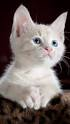

1/1 [==============================] - 1s 581ms/step
[[ 5.8590465 -4.283946 ]]
0
The image represents a Cat


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Path of the image to be predicted: /content/dog2.jpg


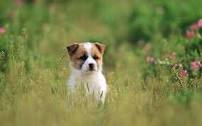

1/1 [==============================] - 0s 47ms/step
[[-2.264089   2.5580912]]
1
The image represents a Dog


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')